In [1]:
root="./aurocs/"
# for each file in root directory read the file and plot the data
import os
import matplotlib.pyplot as plt
import numpy as np
def get_trained_loss(checkpoint):
    trained_loss=("".join(checkpoint.split('.')[0].split('_')[2:]))[:-12]
    return trained_loss
if not os.path.isdir("aurocs/plots/"):
    os.makedirs("aurocs/plots/")
    

imagenetcrossentropy
imagenetbest
imagenetunknown


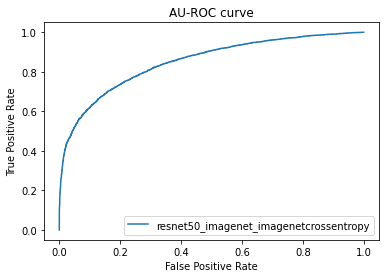

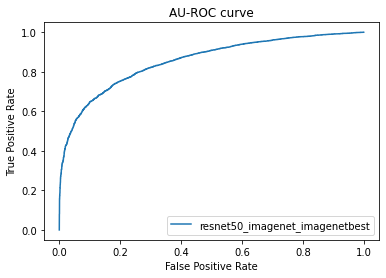

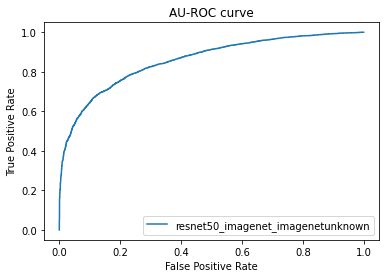

In [2]:
for file in os.listdir(root):
    if not ".png" in file and os.path.isfile(root+file) and "imagenet" in file:
        plt.figure()
        data = np.load(root+file)
        # file= resnet56_svhn_NLL+MDCA_25-May_tpr_fpr.npy, trained_loss=NLL+MDCA, model=resnet56, dataset=svhn
        trained_loss=get_trained_loss(file)
        model=file.split('_')[0]
        dataset=file.split('_')[1]
        label=file[:-19]
        x = data[0:len(data)//2]
        y = data[len(data)//2:]
        plt.plot(x,y,label=model+'_'+dataset+"_"+trained_loss)
        plt.title("AU-ROC curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.savefig(root+"/plots/"+file+".png")
        print(trained_loss)


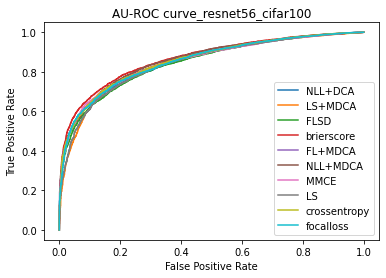

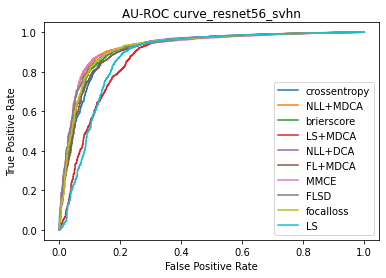

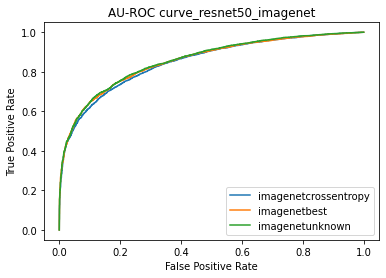

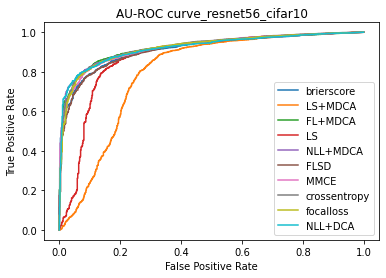

In [3]:
# for all files with same model and dataset plot on same plot
plots={}
for file in os.listdir(root):
    if not ".png" in file and os.path.isfile(root+file):
        data = np.load(root+file)
        # file= resnet56_svhn_NLL+MDCA_25-May_tpr_fpr.npy, trained_loss=NLL+MDCA, model=resnet56, dataset=svhn
        trained_loss=get_trained_loss(file)
        model=file.split('_')[0]
        dataset=file.split('_')[1]
        if model+'_'+dataset not in plots:
            plots[model+'_'+dataset]={}
        plots[model+'_'+dataset][trained_loss]=data

for plot in plots:
    plt.figure()
    for trained_loss in plots[plot]:
        data=plots[plot][trained_loss]
        x = data[0:len(data)//2]
        y = data[len(data)//2:]
        plt.plot(x,y,label=trained_loss)
    plt.title("AU-ROC curve"+"_"+plot)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.savefig(root+"/plots/"+plot+"_combined.svg",dpi=600)
    